## 1. Imports and Data Loading

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

/tmp/ipykernel_20424/3801697496.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


## 2. Data Structure and Quality Assessment

In [30]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## 3. Descriptive Statistics

In [31]:
# Descriptive statistics for key financial columns
print(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe())

       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07


## 4. Loss Ratio Analysis

In [32]:
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Overall Loss Ratio
overall_loss_ratio = df['LossRatio'].mean()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")

# Loss Ratio by Province, VehicleType, Gender
print(df.groupby('Province')['LossRatio'].mean())
print(df.groupby('VehicleType')['LossRatio'].mean())
print(df.groupby('Gender')['LossRatio'].mean())

Overall Loss Ratio: nan
Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64
VehicleType
Bus                       inf
Heavy Commercial          inf
Light Commercial     0.543917
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


/home/ashe/Projects/10academy/end-to-end-insurance-analytics/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


## 5. Univariate Analysis & Outlier Detection

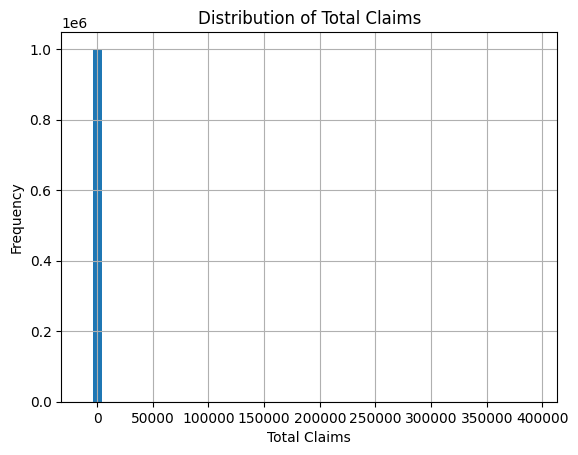

In [33]:
# Histogram for Total Claims
df['TotalClaims'].hist(bins=50)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.ylabel('Frequency')
plt.show()

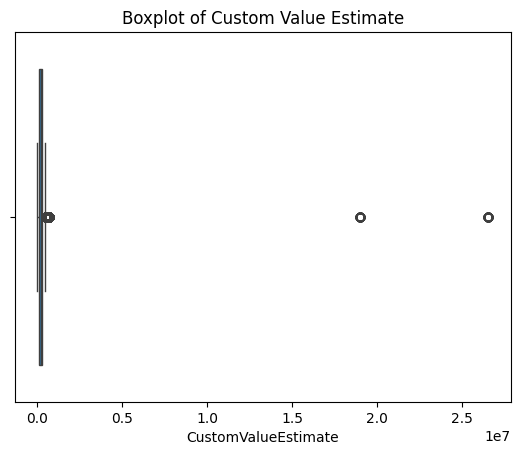

In [34]:
# Boxplot for Custom Value Estimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Boxplot of Custom Value Estimate')
plt.show()

## 6. Temporal Trends

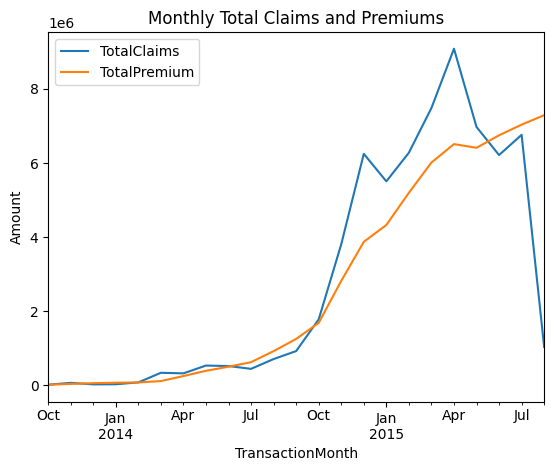

In [35]:
# Convert TransactionMonth to datetime and analyze monthly trends
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims':'sum', 'TotalPremium':'sum'})
monthly.plot(y=['TotalClaims', 'TotalPremium'])
plt.title('Monthly Total Claims and Premiums')
plt.ylabel('Amount')
plt.show()

## 7. Vehicle Make/Model Analysis

In [36]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'LossRatio'],
      dtype='object')


In [37]:
make_claims = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
print("Top 5 Makes by Avg Claim:", make_claims.head())
print("Bottom 5 Makes by Avg Claim:", make_claims.tail())

Top 5 Makes by Avg Claim: make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
Name: TotalClaims, dtype: float64
Bottom 5 Makes by Avg Claim: make
OPEL       0.0
RENAULT    0.0
SCANIA     0.0
TATA       0.0
VOLVO      0.0
Name: TotalClaims, dtype: float64


## 8. Bivariate/Multivariate Analysis

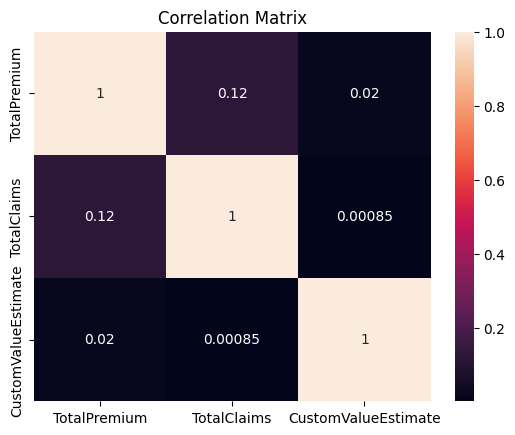

In [38]:
# Correlation matrix
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

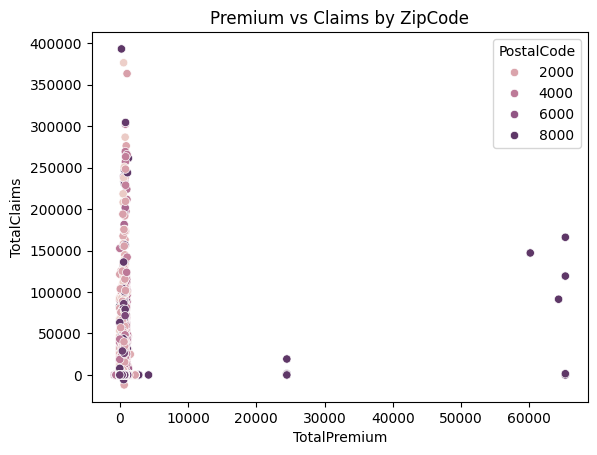

In [39]:
# Scatter plot by ZipCode
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)
plt.title('Premium vs Claims by ZipCode')
plt.show()

## 9. Creative Visualizations

### Loss Ratio by Province

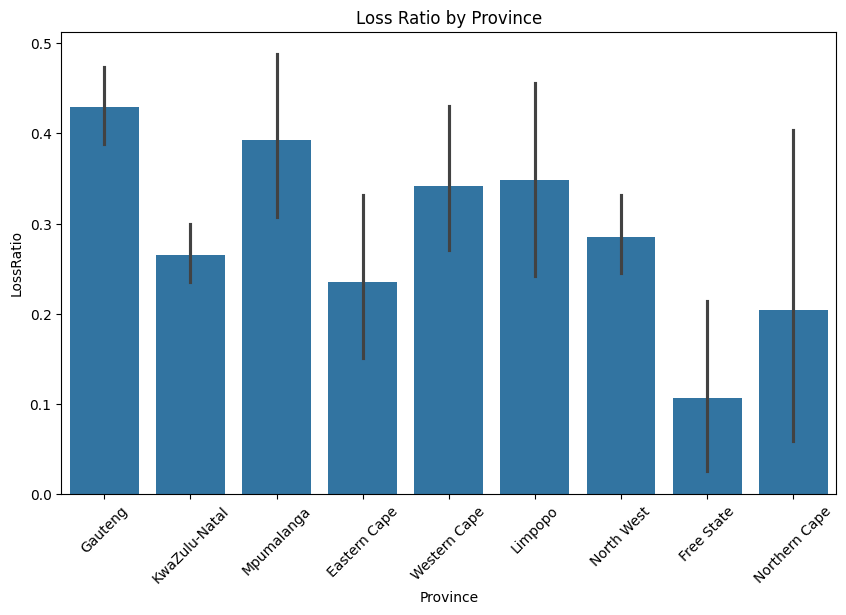

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Province', y='LossRatio', data=df)
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.show()

### Monthly Claims Trend (Line Plot)

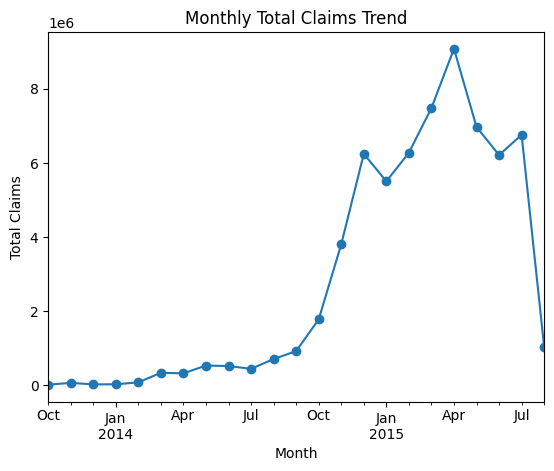

In [41]:
monthly['TotalClaims'].plot(kind='line', marker='o')
plt.title('Monthly Total Claims Trend')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.show()

### Boxplot of Claims by VehicleType

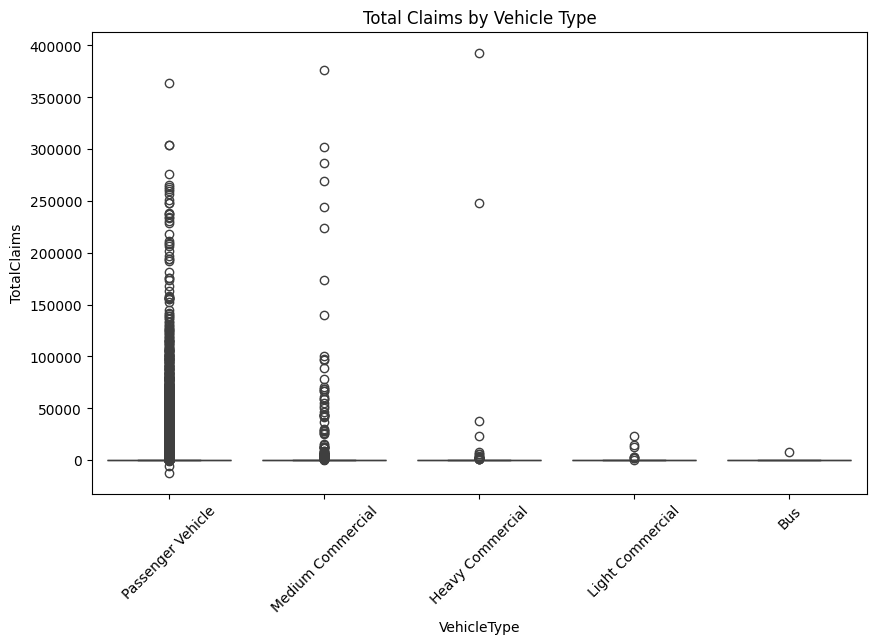

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('Total Claims by Vehicle Type')
plt.xticks(rotation=45)
plt.show()